In [4]:
import matplotlib.pyplot as plt
import numpy as np

(20,)


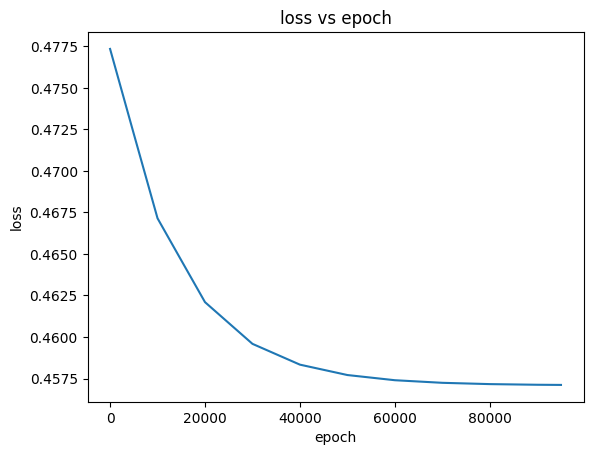

In [9]:
loss=np.load('loss.npy')
ls=[]
for i in range(0,20):
    ls.append(i*5000)
plt.plot(ls,loss)
plt.title('loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()